In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/home/ishan/Desktop/IRIS.csv')

In [87]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
cleanup_nums = {"species":     {"Iris-setosa": 1, "Iris-versicolor": 2 ,"Iris-virginica": 3}}
data.replace(cleanup_nums,inplace=True)

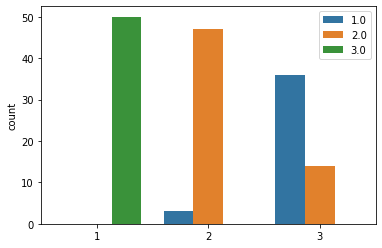

In [89]:
###############################

#FORMING CLUSTERS

###############################

def distance(c):
    ans=[]
    newc=np.zeros(c.shape)
    cnt=np.zeros(len(c))
    global arr
    for i in range(len(arr)):
        l=[]
        for j in range(len(c)):
            l.append([np.sum(((arr[i][0:4]-c[j][0:4])**2)),j+1])
        
        f=min(l)
        arr[i][4]=f[1]
        newc[f[1]-1]+=arr[i][0:4]
        cnt[f[1]-1]+=1
    
    diff=[]
    for i in range(len(newc)):
        newc[i]=newc[i]/cnt[i]
        diff.append(np.sum(newc[i]-c[i]))
    if(sum(diff)<0.01):
        return newc,True
    else:
        return newc,False
    
centers=np.asarray(data.drop('species',axis=1)[0:3])
arr=np.asarray(data)
arr1=np.asarray(data['species'])

val=bool
while(True):
    centers,val=distance(centers)
    if(val):
        break

length=len(arr)
l=[]
cnt=0
for i in range(length):
    l.append(arr[i][4])

sns.countplot(arr1,hue=l)

#From graph majority points in 
######class 1 belong to cluster 3
######class 2 belong to cluster 2
######class 3 belong to cluster 1

In [90]:
#########################

#PREDICTION

#########################

test=[4.7 ,3.2 ,1.3 ,0.2 ]
l=[]
for j in range(len(centers)):
    l.append([np.sum(((test[0:4]-centers[j][0:4])**2)),j+1])
        
ans=min(l)[1]

if(ans==3):
    print("Iris-setosa")
elif(ans==2):
    print("Iris-versicolor")
elif(ans==1):
    print("Iris-virginica")

Iris-setosa
